# Pregunta 6

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[178   3]
 [ 16  95]]


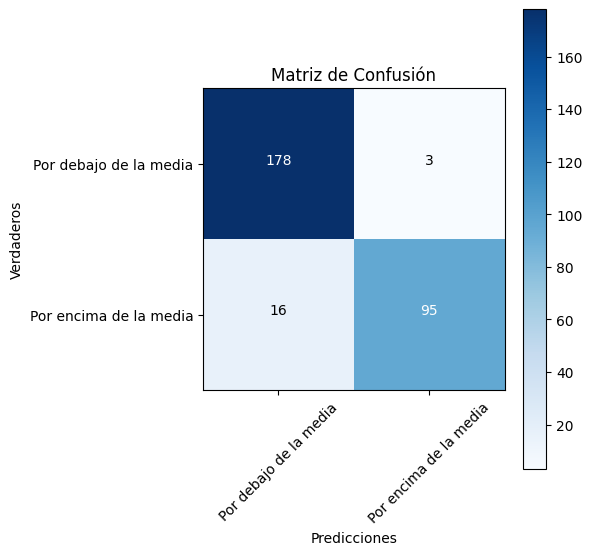

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       181
           1       0.97      0.86      0.91       111

    accuracy                           0.93       292
   macro avg       0.94      0.92      0.93       292
weighted avg       0.94      0.93      0.93       292



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('train.csv')

# Filtrar solo las columnas numéricas para las variables predictoras
df_numeric = df.select_dtypes(include=[np.number])

# Separar la variable de respuesta 'SalePrice' y las variables predictoras
y_reg = df['SalePrice']
X_reg = df_numeric.drop(columns=['SalePrice'])

# Manejo de valores nulos: reemplazar valores nulos con la media
X_reg = X_reg.fillna(X_reg.mean())

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Dividir los precios en categorías para poder hacer clasificación (por encima o por debajo de la media)
y_train_class = (y_train > y_train.mean()).astype(int)
y_test_class = (y_test > y_test.mean()).astype(int)

# Crear un modelo de regresión logística para clasificación
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train_class)

# Predecir con el modelo
y_pred_class = model.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
classes = ['Por debajo de la media', 'Por encima de la media']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Etiquetas de los ejes
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')

# Añadir los valores en la matriz
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Imprimir un reporte detallado de la clasificación
print("Reporte de clasificación:")
print(classification_report(y_test_class, y_pred_class))


# Pregunta 7


### Entrenamiento

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar los datos (asegúrate de tener el DataFrame `df` listo)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el preprocesamiento para las variables categóricas y manejo de valores faltantes
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con la moda
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificación OneHot
        ]), X.select_dtypes(include=['object']).columns),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)  # Imputación para columnas numéricas
    ]
)

# Crear el modelo con un pipeline de preprocesamiento
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para ambos conjuntos
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE en entrenamiento: {mse_train}')
print(f'MSE en prueba: {mse_test}')

# Análisis del sobreajuste o desajuste
if mse_train < mse_test:
    print("El modelo puede estar sobreajustado (overfitting).")
elif mse_train > mse_test:
    print("El modelo puede estar desajustado (underfitting).")
else:
    print("El modelo parece estar bien ajustado.")


MSE en entrenamiento: 594240888.79965
MSE en prueba: 981414258.468189
El modelo puede estar sobreajustado (overfitting).


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar los datos (reemplazar con tu DataFrame)
df = pd.read_csv('train.csv')

# Selección de las características y la variable objetivo
X = df.drop('SalePrice', axis=1)  # Suponiendo que 'SalePrice' es la variable objetivo
y = df['SalePrice']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificación de columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Corrección aquí
        ]), categorical_cols)
    ]
)

# Crear el modelo con regularización Ridge (puedes probar también Lasso)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Ajuste del parámetro alpha para regularización
])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE en entrenamiento: {mse_train}')
print(f'MSE en prueba: {mse_test}')


MSE en entrenamiento: 450383859.5388203
MSE en prueba: 890606216.4007324


# Ejercicio 8

In [18]:
import time
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cargar los datos (reemplazar con tu DataFrame)
df = pd.read_csv('train.csv')

# Selección de las características y la variable objetivo
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificación de columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ]
)

# Función para entrenar y evaluar el modelo
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    # Crear el pipeline con el modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Realizar predicciones
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calcular el MSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Calcular el tiempo de procesamiento
    end_time = time.time()
    processing_time = end_time - start_time
    
    return mse_train, mse_test, processing_time

# Evaluación de Linear Regression
print("Evaluando Linear Regression...")
lr_model = LinearRegression()
lr_mse_train, lr_mse_test, lr_time = evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print(f"Linear Regression - MSE Entrenamiento: {lr_mse_train}, MSE Prueba: {lr_mse_test}, Tiempo: {lr_time:.2f} segundos")

# Evaluación de Ridge Regression
print("Evaluando Ridge Regression...")
ridge_model = Ridge(alpha=1.0)
ridge_mse_train, ridge_mse_test, ridge_time = evaluate_model(ridge_model, X_train, y_train, X_test, y_test)
print(f"Ridge Regression - MSE Entrenamiento: {ridge_mse_train}, MSE Prueba: {ridge_mse_test}, Tiempo: {ridge_time:.2f} segundos")

# Comparar resultados
print("\nComparación de resultados:")
print(f"Linear Regression vs Ridge Regression (Entrenamiento) MSE: {lr_mse_train} vs {ridge_mse_train}")
print(f"Linear Regression vs Ridge Regression (Prueba) MSE: {lr_mse_test} vs {ridge_mse_test}")
print(f"Linear Regression vs Ridge Regression (Tiempo de procesamiento): {lr_time:.2f} segundos vs {ridge_time:.2f} segundos")


Evaluando Linear Regression...
Linear Regression - MSE Entrenamiento: 381540648.6603396, MSE Prueba: 868979502.7954118, Tiempo: 0.19 segundos
Evaluando Ridge Regression...
Ridge Regression - MSE Entrenamiento: 450383859.5388203, MSE Prueba: 890606216.4007324, Tiempo: 0.13 segundos

Comparación de resultados:
Linear Regression vs Ridge Regression (Entrenamiento) MSE: 381540648.6603396 vs 450383859.5388203
Linear Regression vs Ridge Regression (Prueba) MSE: 868979502.7954118 vs 890606216.4007324
Linear Regression vs Ridge Regression (Tiempo de procesamiento): 0.19 segundos vs 0.13 segundos


# Ejercicio 9

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

# Cargar los datos (asegúrate de tener el DataFrame `df` listo)
df = pd.read_csv('train.csv')

# Selección de las características y la variable objetivo
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Imputar valores numéricos con la media y categóricos con la moda
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes
    ('scaler', StandardScaler())  # Escalado de valores numéricos
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Codificación de variables categóricas a densas
])

# Crear un transformador compuesto para manejar ambos tipos de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Función para entrenar y evaluar el modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()  # Para medir el tiempo de procesamiento
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    end_time = time.time()
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    time_taken = end_time - start_time
    
    return mse_train, mse_test, time_taken

# Modelos a evaluar
models = {
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsRegressor(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Crear un pipeline que incluya el preprocesador y el modelo
for name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', model)])
    
    mse_train, mse_test, time_taken = evaluate_model(model_pipeline, X_train, X_test, y_train, y_test)
    print(f"{name} - MSE Entrenamiento: {mse_train}, MSE Prueba: {mse_test}, Tiempo: {time_taken} segundos")


SVM - MSE Entrenamiento: 6228655679.933305, MSE Prueba: 7854595775.061981, Tiempo: 0.8416552543640137 segundos
Decision Tree - MSE Entrenamiento: 0.0, MSE Prueba: 1816869590.3321917, Tiempo: 0.16023492813110352 segundos
Random Forest - MSE Entrenamiento: 129910833.5018298, MSE Prueba: 839862659.8800033, Tiempo: 4.506416320800781 segundos
Naive Bayes - MSE Entrenamiento: 73318202.05479452, MSE Prueba: 5307560031.880137, Tiempo: 2.332200765609741 segundos
KNN - MSE Entrenamiento: 983355386.2927054, MSE Prueba: 1506615367.3161645, Tiempo: 0.5762732028961182 segundos
Logistic Regression - MSE Entrenamiento: 168878.42465753425, MSE Prueba: 2249923986.2465754, Tiempo: 5.814993143081665 segundos


# Ejercicio 10

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar el archivo CSV
df = pd.read_csv('train.csv')

# Verificar las columnas para encontrar la variable de respuesta
print(df.columns)

# Separar las características (X) y la variable de respuesta (y)
X = df.drop('SalePrice', axis=1)  # 'SalePrice' es la columna con el precio de la casa
y = df['SalePrice']

# Convertir variables categóricas en variables numéricas (si las hay)
X = pd.get_dummies(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que incluya el escalado de características y el modelo de regresión
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar las características
    ('regressor', RandomForestRegressor())  # Modelo de regresión (puedes cambiarlo por otro modelo)
])

# Definir los parámetros para el ajuste de GridSearch
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular el MSE para el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Imprimir los resultados
print(f'MSE Entrenamiento: {mse_train}')
print(f'MSE Prueba: {mse_test}')
print(f'Best parameters found: {grid_search.best_params_}')


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

KeyboardInterrupt: 

# Pregunta 11

In [39]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Cargar el dataset
data = pd.read_csv('train.csv')

# Eliminar la columna 'Id' y manejar valores faltantes
data = data.drop(columns=['Id'])

# Separar las columnas numéricas y categóricas
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Imputar valores faltantes en columnas numéricas con la media
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

# Convertir las variables categóricas a variables dummy (One Hot Encoding)
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Seleccionar las variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestRegressor()
}

# Entrenamiento y evaluación de los modelos
results = {}
for model_name, model in models.items():
    # Entrenar el modelo
    if model_name == 'Naive Bayes':  # GaussianNB no acepta variables categóricas directamente
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

# Mostrar los resultados
results_df = pd.DataFrame(results).T
print(results_df)


                            MAE           MSE        R2
Regresión Lineal   20480.858424  2.426132e+09  0.683699
Árbol de Decisión  27263.380137  1.700540e+09  0.778296
KNN                28134.611644  2.273951e+09  0.703539
Naive Bayes        30284.996575  2.714266e+09  0.646134
Random Forest      17617.303973  8.439409e+08  0.889973
